In [1]:
import numpy as np
#important imports
import mediapipe as mp
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from os import listdir
import shutil
from PIL import Image, ImageOps

#LEFT = 1 / RIGHT = 0

#setting important variables
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils
image_size = (256,256)
dataset_dir = "Dataset"
exception_dir = "Exceptions"
left_raw_dir = "Dataset\orig_left"
right_raw_dir = "Dataset\orig_right"
left_data_dir = "Dataset\data_left"
right_data_dir = "Dataset\data_right"
# results = pose.process(image)


def save_landmark (landmarks, label=-1):
    lm = []
    for i in range(33):
        if i not in range(13,23):
            lm.append(landmarks[i].x)
            lm.append(landmarks[i].y)
            lm.append(landmarks[i].z)
            lm.append(landmarks[i].visibility)    
    if(label != -1): lm.append(label)
    return lm

#custom style
# from mediapipe.python.solutions.pose import PoseLandmark
# from mediapipe.python.solutions.drawing_utils import DrawingSpec
# mp_drawing_styles = mp.solutions.drawing_styles
# custom_style = mp_drawing_styles.get_default_pose_landmarks_style()
# custom_connections = list(mp_pose.POSE_CONNECTIONS)

# excluded_landmarks = [
#     PoseLandmark.LEFT_ELBOW,
#     PoseLandmark.RIGHT_ELBOW,
#     PoseLandmark.LEFT_WRIST,
#     PoseLandmark.RIGHT_WRIST,
#     PoseLandmark.LEFT_PINKY,
#     PoseLandmark.RIGHT_PINKY,
#     PoseLandmark.LEFT_INDEX,
#     PoseLandmark.RIGHT_INDEX,
#     PoseLandmark.LEFT_THUMB,
#     PoseLandmark.RIGHT_THUMB
# ]
# for landmark in excluded_landmarks:
#     custom_style[landmark] = DrawingSpec(color=(245,117,66), thickness=2)
#     custom_connections = [connection_tuple for connection_tuple in custom_connections 
#                             if landmark.value not in connection_tuple]

In [2]:
#iterate through images in folders and process them

for images in os.listdir(left_raw_dir):
    if (images.endswith(".png") or 
        images.endswith(".jpg") or 
        images.endswith(".jpeg")):
        pre_proc_image = Image.open(os.path.join(left_raw_dir, images))
        processed_image = ImageOps.cover(pre_proc_image, image_size).save(os.path.join(left_data_dir, images))
        flip_image = pre_proc_image.transpose(method=Image.FLIP_LEFT_RIGHT)
        ImageOps.cover(flip_image, image_size).save(os.path.join(right_data_dir, images))

for images in os.listdir(right_raw_dir):
    if (images.endswith(".png") or 
        images.endswith(".jpg") or 
        images.endswith(".jpeg")):
        pre_proc_image = Image.open(os.path.join(right_raw_dir, images))
        processed_image = ImageOps.cover(pre_proc_image, image_size).save(os.path.join(right_data_dir, images))
        flip_image = pre_proc_image.transpose(method=Image.FLIP_LEFT_RIGHT)
        ImageOps.cover(flip_image, image_size).save(os.path.join(left_data_dir, images))



In [3]:
test_image = Image.open('lungeTest.jpg')
test_image.transpose(method=Image.FLIP_LEFT_RIGHT).save('lungeTestAlt.jpg')

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[0.34592878818511963, 0.3274519145488739, -0.0013742252485826612, 0.9999468326568604, 0.3540983200073242, 0.31430691480636597, -0.02174680307507515, 0.9999570846557617, 0.35550424456596375, 0.31444573402404785, -0.021767418831586838, 0.9999504089355469, 0.356915682554245, 0.3145919740200043, -0.021793795749545097, 0.9999713897705078, 0.3538705110549927, 0.3136775493621826, 0.015796061605215073, 0.9999555349349976, 0.35514283180236816, 0.3133563697338104, 0.01585070975124836, 0.9999473094940186, 0.35644277930259705, 0.31293460726737976, 0.01591424271464348, 0.9999566078186035, 0.3701974153518677, 0.3239165246486664, -0.08088129013776779, 0.9999679327011108, 0.36930030584335327, 0.321238249540329, 0.09025351703166962, 0.9998409748077393, 0.3508351743221283, 0.34264370799064636, -0.02279374748468399, 0.9999188184738159, 0.35002195835113525, 0.34214863181114197, 0.02638373337686062, 0.9998005032539368, 0.3875584304332733, 0.4084264636039734, -0.1661553531885147, 0.9999762773513794, 0.38819

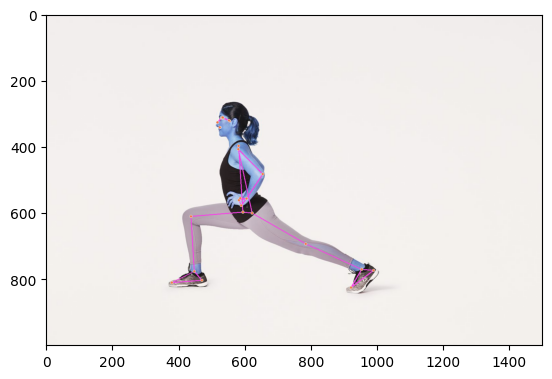

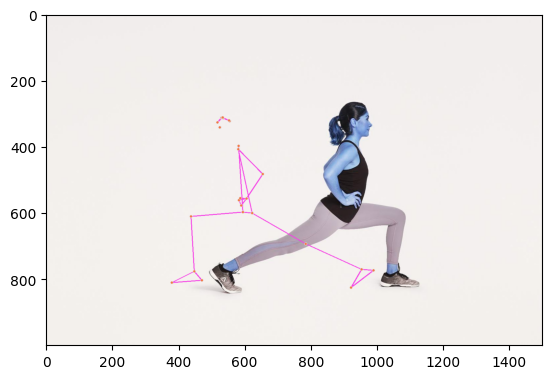

In [4]:
#---Single Test---#

#create empty landmark list
landmark_list = []

#import image and process with Mediapipe
image = mpimg.imread("./lungeTest.jpg")
# newimage = image.resize(256,256)
# plt.figure()
# plt.imshow(newimage)
procImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
procImage.flags.writeable = False
    # plt.figure()
    # plt.imshow(procImage)
results = pose.process(procImage)
#attempt to save landmarks
try:
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        # print (landmarks)
        # for i in range(33):
        #     if i not in range(13,23):
        #         print (i)
        #         print (landmarks[i])
        lm = save_landmark(landmarks, 0)
        print (lm)
        landmark_list.append(lm)
        
except:
    pass

#import image and process with Mediapipe
image2 = mpimg.imread("./lungeTestAlt.jpg")
# newimage = image.resize(256,256)
# plt.figure()
# plt.imshow(newimage)
procImage2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
procImage2.flags.writeable = False
    # plt.figure()
    # plt.imshow(procImage)
results2 = pose.process(procImage2)
#attempt to save landmarks
try:
    if results2.pose_landmarks:
        landmarks2 = results2.pose_landmarks.landmark
        # print (landmarks)
        # for i in range(33):
        #     if i not in range(13,23):
        #         print (i)
        #         print (landmarks[i])
        lm2 = save_landmark(landmarks2, 1)
        print (lm2)
        landmark_list.append(lm2)
        
except:
    pass

print(landmark_list)
#visualize landmarks
procImage.flags.writeable = True
mp_drawing.draw_landmarks(
            procImage, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,            
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
            )
plt.figure()
plt.imshow(procImage)

#visualize landmarks
procImage2.flags.writeable = True
mp_drawing.draw_landmarks(
            procImage2, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,            
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
            )
plt.figure()
plt.imshow(procImage2)

#visualize custom landmarks
# procImage.flags.writeable = True
# mp_drawing.draw_landmarks(
#             procImage,
#             results.pose_landmarks,
#             connections = custom_connections, #  passing the modified connections list
#             landmark_drawing_spec=custom_style) # and drawing style 
# plt.figure()
# plt.imshow(procImage)


#write data to csv
df = pd.DataFrame(landmark_list)
# df.to_csv("lunge"+".txt")
df.to_csv("lunge_landmark.csv", header=False)
# df.to_csv("lunge_landmark_test.csv")


In [5]:
#Pose Estimate Iterated Images in Folder#

#create empty landmark list
landmark_list = []

#iterate through all images in left folder
for images in os.listdir(left_data_dir):
    if (images.endswith(".png") or 
        images.endswith(".jpg") or 
        images.endswith(".jpeg")):
        #attempt pose estimation
        image = mpimg.imread(os.path.join(left_data_dir,images))
        procImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        procImage.flags.writeable = False
        try: 
            results = pose.process(procImage)
        except: 
            # pass
            shutil.move(os.path.join(left_data_dir,images), os.path.join(exception_dir,images))
        try:
            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark
                lm = save_landmark(landmarks, 0)
                landmark_list.append(lm)
        except: 
            # pass
            shutil.move(os.path.join(left_data_dir,images), os.path.join(exception_dir,images))

#iterate through all images in right folder           
for images in os.listdir(right_data_dir):
    if (images.endswith(".png") or 
        images.endswith(".jpg") or 
        images.endswith(".jpeg")):
        #attempt pose estimation
        image = mpimg.imread(os.path.join(right_data_dir,images))
        procImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        procImage.flags.writeable = False
        try: 
            results = pose.process(procImage)
        except: 
            # pass
            shutil.move(os.path.join(right_data_dir,images), os.path.join(exception_dir,images))
        try:
            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark
                lm = save_landmark(landmarks, 1)
                landmark_list.append(lm)
        except: 
            # pass
            shutil.move(os.path.join(right_data_dir,images), os.path.join(exception_dir,images))
        
# write data to csv
df = pd.DataFrame(landmark_list)
df.to_csv("lunge_landmark_list.csv", header=False)
# df.to_csv("lunge_landmark_list_test.csv")